# The determinants of early childhood education services provision

### An example of unbalanced dataset without resampling

In [1]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression # LogisticRegression Package
import matplotlib.pyplot as plt # For visualization
import numpy as np 

import seaborn as sns # To visualize the count table
sns.set(style="white") # Options for sns
sns.set(style="whitegrid", color_codes=True) # Options for sns

The research question is what are the determinants of the provision of early childhood education services. 

In this example we are using "Data Science Training Program Dataset1 - CommonCore". 

First import the "CCD_Dataset" sheet from the excel file.
You can replace the file_path with the pathname on your local disk.

In [22]:
# Import the data from local disc
file_path = "Data Science Training Program Dataset1 - CommonCore.xlsx"
df = pd.read_excel(file_path, sheet_name='CCD_Dataset')  

In [3]:
df

,LEAID,LEA_NAME,ST_NAME,ST,COUNTY_NM,COUNTY_NO,NUM_SCHS,NUM_CHRTS,TYPE,LEP,...,LEA_DISTEDENR_WH_M,LEA_DISTEDENR_WH_F,LEA_DISTEDENR_TR_M,LEA_DISTEDENR_TR_F,TOT_DISTEDENR_M,TOT_DISTEDENR_F,LEA_DISTEDENR_LEP_M,LEA_DISTEDENR_LEP_F,LEA_DISTEDENR_IDEA_M,LEA_DISTEDENR_IDEA_F
0,100002,Alabama Youth Services,ALABAMA,AL,Jefferson County,1073,0,0,8-Other education agencies,-1,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,100005,Albertville City,ALABAMA,AL,Marshall County,1095,6,0,1-Regular local school district that is NOT a ...,929,...,2,9,0,0,4,14,0,0,0,0
2,100006,Marshall County,ALABAMA,AL,Marshall County,1095,15,0,1-Regular local school district that is NOT a ...,394,...,45,52,0,0,64,75,0,0,3,2
3,100007,Hoover City,ALABAMA,AL,Jefferson County,1073,17,0,1-Regular local school district that is NOT a ...,760,...,130,240,9,12,218,340,18,28,28,9
4,100008,Madison City,ALABAMA,AL,Madison County,1089,11,0,1-Regular local school district that is NOT a ...,364,...,59,107,2,1,89,154,2,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16724,5680250,Region V BOCES,WYOMING,WY,Teton County,56039,1,0,5-State agency providing elementary and/or sec...,-1,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
16725,5680251,Wyoming Department of Family Services,WYOMING,WY,Laramie County,56021,2,0,5-State agency providing elementary and/or sec...,-1,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
16726,5680252,Youth Emergency Services Inc. - Administration...,WYOMING,WY,Campbell County,56005,1,0,5-State agency providing elementary and/or sec...,-1,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
16727,5680254,Saint Stephen's Indian School Admin Office,WYOMING,WY,Fremont County,56013,1,0,5-State agency providing elementary and/or sec...,-1,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df = df.replace(-1, np.NaN)
df = df.replace(-2, np.NaN)
df = df.replace(-9, np.NaN)
df =df.replace("Yes", 1)
df = df.replace("No",0)
df

,LEAID,LEA_NAME,ST_NAME,ST,COUNTY_NM,COUNTY_NO,NUM_SCHS,NUM_CHRTS,TYPE,LEP,...,LEA_DISTEDENR_WH_M,LEA_DISTEDENR_WH_F,LEA_DISTEDENR_TR_M,LEA_DISTEDENR_TR_F,TOT_DISTEDENR_M,TOT_DISTEDENR_F,LEA_DISTEDENR_LEP_M,LEA_DISTEDENR_LEP_F,LEA_DISTEDENR_IDEA_M,LEA_DISTEDENR_IDEA_F
0,100002,Alabama Youth Services,ALABAMA,AL,Jefferson County,1073,0,0.0,8-Other education agencies,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,Albertville City,ALABAMA,AL,Marshall County,1095,6,0.0,1-Regular local school district that is NOT a ...,929.0,...,2.0,9.0,0.0,0.0,4.0,14.0,0.0,0.0,0.0,0.0
2,100006,Marshall County,ALABAMA,AL,Marshall County,1095,15,0.0,1-Regular local school district that is NOT a ...,394.0,...,45.0,52.0,0.0,0.0,64.0,75.0,0.0,0.0,3.0,2.0
3,100007,Hoover City,ALABAMA,AL,Jefferson County,1073,17,0.0,1-Regular local school district that is NOT a ...,760.0,...,130.0,240.0,9.0,12.0,218.0,340.0,18.0,28.0,28.0,9.0
4,100008,Madison City,ALABAMA,AL,Madison County,1089,11,0.0,1-Regular local school district that is NOT a ...,364.0,...,59.0,107.0,2.0,1.0,89.0,154.0,2.0,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16724,5680250,Region V BOCES,WYOMING,WY,Teton County,56039,1,0.0,5-State agency providing elementary and/or sec...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16725,5680251,Wyoming Department of Family Services,WYOMING,WY,Laramie County,56021,2,0.0,5-State agency providing elementary and/or sec...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16726,5680252,Youth Emergency Services Inc. - Administration...,WYOMING,WY,Campbell County,56005,1,0.0,5-State agency providing elementary and/or sec...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16727,5680254,Saint Stephen's Indian School Admin Office,WYOMING,WY,Fremont County,56013,1,0.0,5-State agency providing elementary and/or sec...,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
LEA = df['LEA_ECE_IND']
LEA.describe()

count    16729.000000
mean         0.169227
std          0.374964
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: LEA_ECE_IND, dtype: float64

In [6]:
print(LEA.unique())
print(LEA.value_counts())

[0 1]
0    13898
1     2831
Name: LEA_ECE_IND, dtype: int64


In [7]:
df.columns

Index(['LEAID', 'LEA_NAME', 'ST_NAME', 'ST', 'COUNTY_NM', 'COUNTY_NO',
       'NUM_SCHS', 'NUM_CHRTS', 'TYPE', 'LEP', 'IEP', 'TOTALREV', 'TOTALEXP',
       'TOTALREVPP', 'TOTALEXPPP', 'LEVEL', 'MEMBER', 'AI_AN', 'AS_PI', 'HI',
       'BL', 'WH', 'NH_OPI', 'TR', 'TOTETH', 'CJJ', 'LEA_ENR',
       'LEA_ENR_NONLEAFAC', 'LEA_SCHOOLS', 'LEA_DESEGPLAN', 'LEA_HBPOLICY_IND',
       'LEA_HBPOLICYURL_IND', 'LEA_HBPOLICY_URL', 'LEA_ECE_IND',
       'LEA_ECE_NONIDEA', 'LEA_PS_IND', 'LEA_PS_FULLDAYFREE',
       'LEA_PS_FULLDAYCOST', 'LEA_PS_PARTDAYFREE', 'LEA_PS_PARTDAYCOST',
       'LEA_PSENR_NONIDEA_A3', 'LEA_PSENR_NONIDEA_A4', 'LEA_PSENR_NONIDEA_A5',
       'LEA_PSENR_A2', 'LEA_PSENR_A3', 'LEA_PSENR_A4', 'LEA_PSENR_A5',
       'LEA_PSELIG_ALL', 'LEA_PSELIG_IDEA', 'LEA_PSELIG_TITLEI',
       'LEA_PSELIG_LOWINC', 'LEA_KG_IND', 'LEA_KG_FULLDAYFREE',
       'LEA_KG_FULLDAYCOST', 'LEA_KG_PARTDAYFREE', 'LEA_KG_PARTDAYCOST',
       'LEA_HSE_IND', 'LEA_HSEPART_HI_M', 'LEA_HSEPART_HI_F',
       'LEA_HSEP

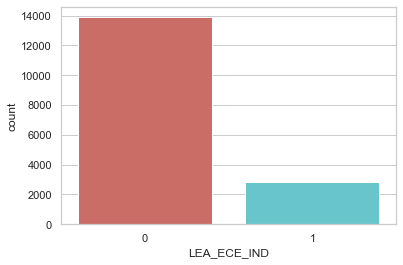

In [8]:
ax= sns.countplot(x='LEA_ECE_IND',data=df, palette='hls')
plt.show() 

In [9]:
perc = 10.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, 
                thresh=min_count)

mod_df= mod_df.select_dtypes(include=np.number)

print(mod_df)

         LEAID  COUNTY_NO  NUM_SCHS  NUM_CHRTS     IEP     TOTALREV  \
0       100002       1073         0        0.0    49.0          NaN   
1       100005       1095         6        0.0   407.0   56909000.0   
2       100006       1095        15        0.0   790.0   59036000.0   
3       100007       1073        17        0.0  1291.0  179516000.0   
4       100008       1089        11        0.0  1172.0  119390000.0   
...        ...        ...       ...        ...     ...          ...   
16724  5680250      56039         1        0.0     NaN          NaN   
16725  5680251      56021         2        0.0     NaN          NaN   
16726  5680252      56005         1        0.0     NaN          NaN   
16727  5680254      56013         1        0.0    23.0          NaN   
16728  5680255      32005         1        0.0     NaN          NaN   

          TOTALEXP  TOTALREVPP  TOTALEXPPP   MEMBER  ...  LEA_ENR  \
0              NaN         NaN         NaN      NaN  ...      280   
1       5

In [10]:
mod_df = mod_df.dropna()
mod_df
X= mod_df.drop(columns=['LEA_ECE_IND', 'LEAID', 'COUNTY_NO'])
X

,NUM_SCHS,NUM_CHRTS,IEP,TOTALREV,TOTALEXP,TOTALREVPP,TOTALEXPPP,MEMBER,AS_PI,HI,...,CJJ,LEA_ENR,LEA_ENR_NONLEAFAC,LEA_SCHOOLS,LEA_DESEGPLAN,LEA_HBPOLICY_IND,LEA_PS_IND,LEA_KG_IND,LEA_HSE_IND,LEA_DISTED_IND
1,6,0.0,407.0,56909000.0,50832000.0,10232.0,9139.0,5562.0,27.0,2709.0,...,0,5445,0,6,0,1,1,1,0,1
2,15,0.0,790.0,59036000.0,61817000.0,10427.0,10918.0,5662.0,20.0,1281.0,...,0,5698,0,13,0,1,1,1,0,1
3,17,0.0,1291.0,179516000.0,178534000.0,12798.0,12728.0,14027.0,952.0,1095.0,...,0,14372,0,16,1,1,1,1,0,1
4,11,0.0,1172.0,119390000.0,116231000.0,11089.0,10795.0,10767.0,907.0,511.0,...,1,10810,0,11,0,1,1,1,0,1
6,4,0.0,279.0,20007000.0,20693000.0,10135.0,10483.0,1974.0,19.0,261.0,...,0,2027,0,4,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16718,11,0.0,444.0,51564000.0,47405000.0,19787.0,18191.0,2606.0,4.0,409.0,...,1,2607,21,11,0,1,0,1,0,1
16719,1,0.0,15.0,3515000.0,3274000.0,34461.0,32098.0,102.0,1.0,0.0,...,0,101,0,1,0,1,1,1,0,1
16720,9,0.0,289.0,76124000.0,74341000.0,26598.0,25975.0,2862.0,59.0,879.0,...,0,2871,0,9,0,1,0,1,0,0
16721,3,0.0,36.0,6657000.0,6384000.0,26209.0,25134.0,254.0,0.0,6.0,...,0,256,0,3,0,1,0,1,0,0


In [11]:
y= mod_df['LEA_ECE_IND']
y

1        1
2        0
3        0
4        0
6        0
        ..
16718    0
16719    1
16720    0
16721    0
16722    0
Name: LEA_ECE_IND, Length: 12599, dtype: int64

In [12]:
import statsmodels.api as sm

logit_model_2=sm.Logit(y,X)
result_2=logit_model_2.fit()
print(result_2.summary2())

Optimization terminated successfully.
         Current function value: 0.388562
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.143     
Dependent Variable:  LEA_ECE_IND      AIC:              9838.9888 
Date:                2022-06-14 00:38 BIC:              10017.5818
No. Observations:    12599            Log-Likelihood:   -4895.5   
Df Model:            23               LL-Null:          -5710.6   
Df Residuals:        12575            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
NUM_SCHS           0.2058   0.0236   8.7115 0.0000  0.1595  0.2521
NUM_CHRTS         -0.1084   0.0187  -5.8049 0.0000 -0

In [13]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

def auc(variables, target, mod_df):
    X = mod_df[variables]
    y = mod_df[target]
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predictions)
    return(auc)

In [14]:
new_cols = ["NUM_SCHS", 'NUM_CHRTS', 'LEA_HBPOLICY_IND', 'LEA_PS_IND', 'IEP']
auc = auc(new_cols,["LEA_ECE_IND"],mod_df)
print(round(auc,2))

0.77


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
new_X =mod_df[new_cols]

logit_model_2=sm.Logit(y,new_X)
result_2=logit_model_2.fit()
print(result_2.summary2())

Optimization terminated successfully.
         Current function value: 0.394905
         Iterations 8
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.129    
Dependent Variable:  LEA_ECE_IND      AIC:              9960.8272
Date:                2022-06-14 00:39 BIC:              9998.0340
No. Observations:    12599            Log-Likelihood:   -4975.4  
Df Model:            4                LL-Null:          -5710.6  
Df Residuals:        12594            LLR p-value:      0.0000   
Converged:           1.0000           Scale:            1.0000   
No. Iterations:      8.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
NUM_SCHS          0.0868   0.0073  11.9743 0.0000  0.0726  0.1011
NUM_CHRTS        -0.1197   0.0177  -6.7659 0.0000 -0.1544 -0.0850


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.25, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


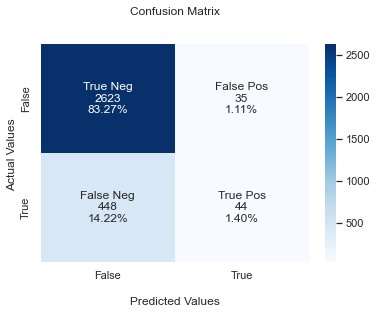

In [18]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2658
           1       0.56      0.09      0.15       492

    accuracy                           0.85      3150
   macro avg       0.71      0.54      0.53      3150
weighted avg       0.81      0.85      0.80      3150



0.5381315494870524


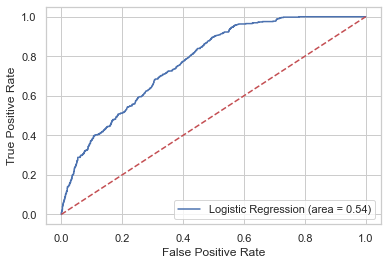

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--') # Drawing 45 degree line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_Unbalanced')
plt.show()